In [1]:
"""
Author: Milan Mitrovic,
s4663796
"""
#According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, 
#responsible for approximately 11% of total deaths.
#This dataset is used to predict whether a patient is likely to get stroke based on the input parameters,
#such as gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

#Data Dictionary:
#id: unique identifier
#gender: "Male", "Female" or "Other"
#age: age of the patient
#hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
#heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
#ever_married: "No" or "Yes"
#work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
#Residence_type: "Rural" or "Urban"
#avg_glucose_level: average glucose level in blood
#bmi: body mass index
#smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
#stroke: 1 if the patient had a stroke or 0 if not
#*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

'\nAuthor: Milan Mitrovic,\ns4663796\n'

In [2]:
#Packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pandas import get_dummies
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.combine import SMOTEENN
from itertools import combinations
from sklearn.exceptions import UndefinedMetricWarning
import warnings

In [3]:
#Ignore Warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#Ignore UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [4]:
#Importing dataset
df= pd.read_csv('C:/Datasets/healthcare-dataset-stroke-data.csv')

In [5]:
#Dimensions of the dataset
df.shape

(5110, 12)

In [6]:
#Returns first 5 rows of the dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [47]:
#Concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [48]:
#Summary of numerical features
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
#Removes duplicates
df.drop_duplicates()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
#Identifies missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [51]:
#Displays feature datatypes
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [52]:
#Displays all rows with 'Other' value in gender column
df[df["gender"] == 'Other']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [53]:
#Returning count of values in gender column
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [9]:
#Dropping id column
df.drop('id',axis=1,inplace=True) 
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
#Drop 'Other' row
df.drop(index=df[df['gender']=='Other'].index,inplace=True)
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [11]:
#Replace bmi null values to bmi mean values
df['bmi'].fillna(((df['bmi'].mean())),inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

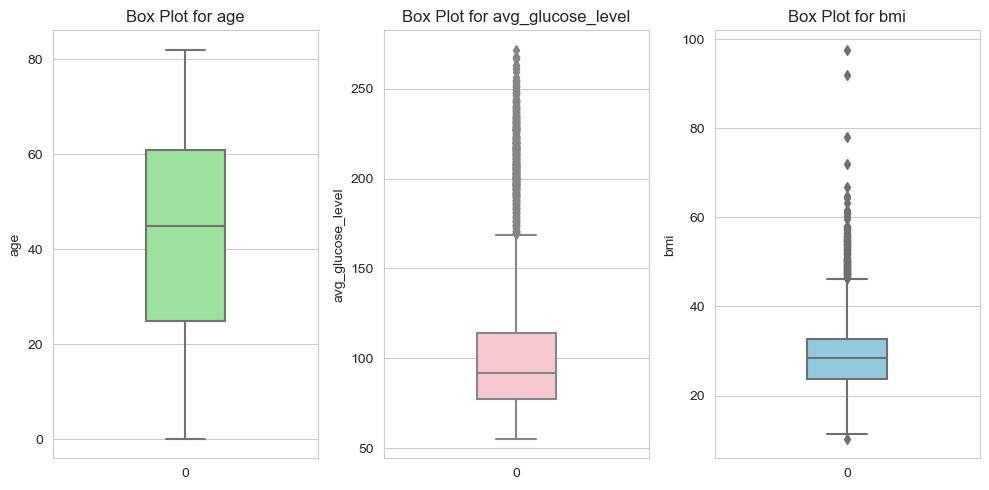

In [57]:
#Box Plots for numerical features to visualize if there are outliers

#Select numerical features
numerical_columns = df.select_dtypes(exclude=['object', 'int']).columns

#Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
axes = axes.flatten()

#Define Colors
colors = ['lightgreen', 'pink', 'skyblue']

#Iterate over each numerical column and plot a Box Plot
for i, column in enumerate(numerical_columns):
    sns.boxplot(df[column], ax=axes[i], color=colors[i], width=0.3)
    axes[i].set_title(f"Box Plot for {column}")
    axes[i].set_ylabel(f"{column}")

plt.tight_layout()
plt.show()

In [12]:
#The percentile method with 0.001 and 0.999 thresholds
feature = 'bmi'

min_thre = df[feature].quantile(0.001)
max_thre = df[feature].quantile(0.999)
min_ex = len(df[df['bmi']<min_thre])
max_ex = len(df[df['bmi']>max_thre])

print(f'len of min threshold excluded {min_ex}\nlen of max threshold excluded {max_ex}')

len of min threshold excluded 6
len of max threshold excluded 6


In [13]:
#Removing the extreme outliers of bmi
print("Old Shape: ", df.shape)

df.drop(index=df[df['bmi']<min_thre].index, inplace=True)
df.drop(index=df[df['bmi']>max_thre].index, inplace=True)
 
print("New Shape: ", df.shape)

Old Shape:  (5109, 11)
New Shape:  (5097, 11)


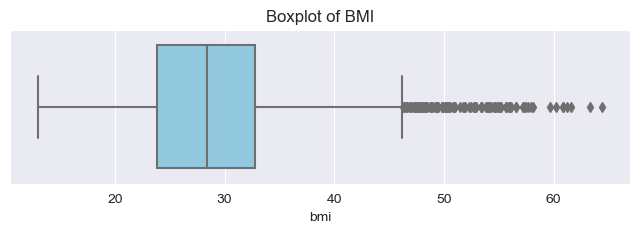

In [60]:
#Boxplot which reflects the new BMI distribution
sns.set_style("darkgrid")
plt.figure(figsize=(8,2))
sns.boxplot(x='bmi', data=df, color='skyblue')
plt.title('Boxplot of BMI')
plt.show()

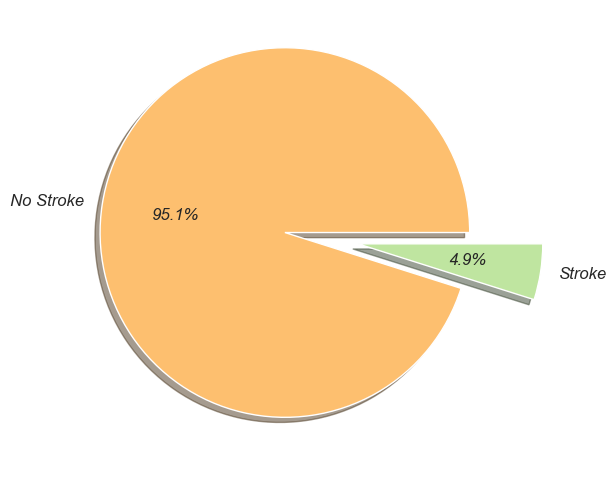

In [61]:
#Pie chart displaying the proportion of stroke
plt.figure(figsize=(10,6))
plt.pie(df.stroke.value_counts(),labels=['No Stroke','Stroke'],autopct='%1.1f%%',
colors=sns.color_palette('Spectral', 2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})
plt.show()


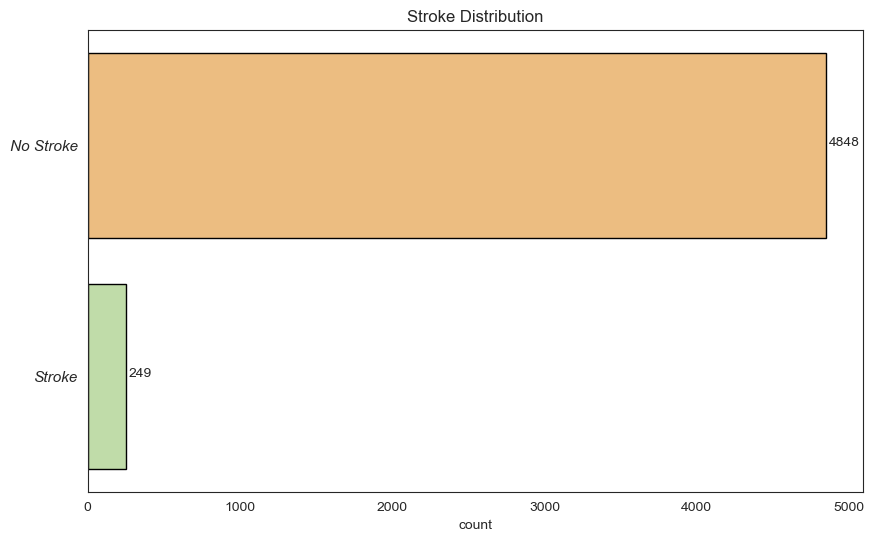

In [62]:
#Countplot depicting Stroke Distribution
plt.figure(figsize=(10, 6))
sns.set_style("white")
ax = sns.countplot(y='stroke', data=df, palette='Spectral', edgecolor='black', linewidth=1)
plt.title('Stroke Distribution')
plt.ylabel('')
plt.yticks([0, 1], ['No Stroke', 'Stroke'], fontsize = 11, style='italic')

#Add count on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 20, p.get_y() + 0.4), fontsize=10)

plt.show()

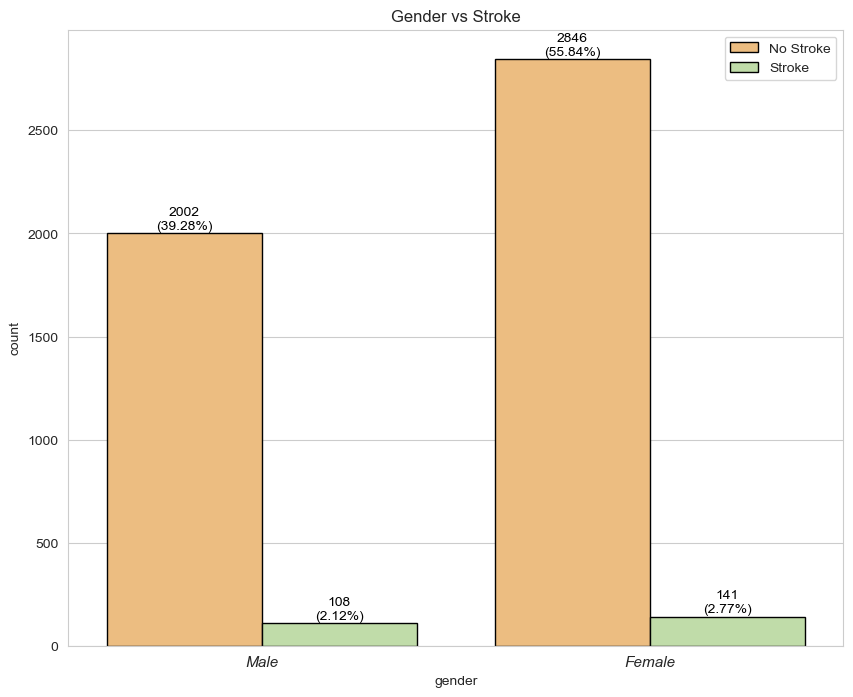

In [63]:
#Countplot depicting gender and stroke correlation
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax = sns.countplot(x='gender', hue="stroke", data=df, palette='Spectral', edgecolor='black', linewidth=1)
plt.title('Gender vs Stroke')
plt.xticks(style='italic', fontsize=11)
plt.legend(labels=['No Stroke', 'Stroke'])

#Add count and percentage on top of each bar
for p in ax.patches:
    height = p.get_height()
    count = int(height) if height.is_integer() else height  
    ax.annotate(f'{count}\n({height/len(df)*100:.2f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

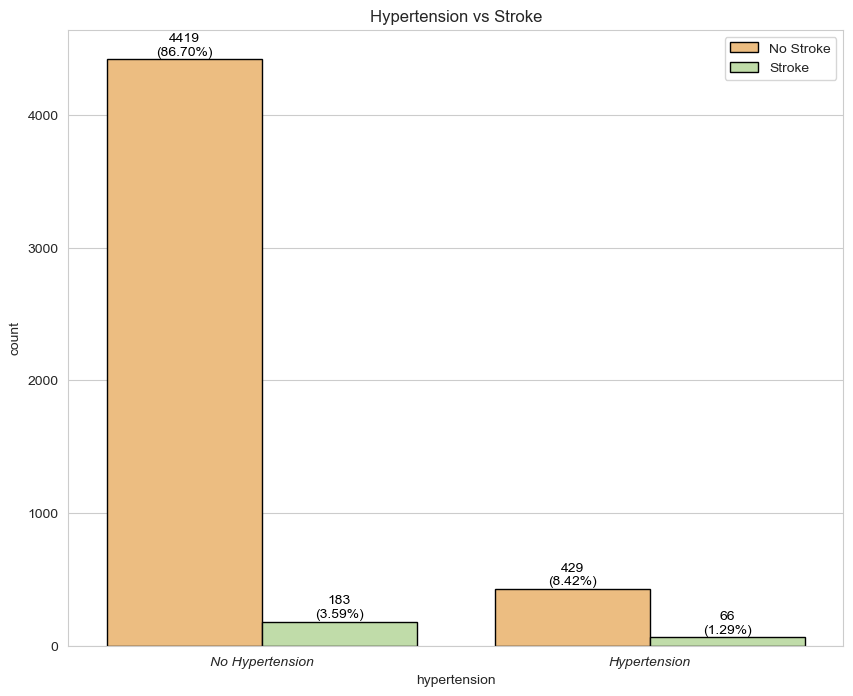

In [64]:
#Countplot depicting hypertension and stroke correlation
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax = sns.countplot(x='hypertension',hue="stroke",data=df, palette='Spectral', edgecolor = 'black', linewidth = 1)
plt.title('Hypertension vs Stroke')
plt.xticks([0,1], ['No Hypertension','Hypertension'], style = 'italic') 
plt.legend(labels=['No Stroke','Stroke'])

#Add count and percentage on top of each bar
for p in ax.patches:
    height = p.get_height()
    count = int(height) if height.is_integer() else height  
    ax.annotate(f'{count}\n({height/len(df)*100:.2f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

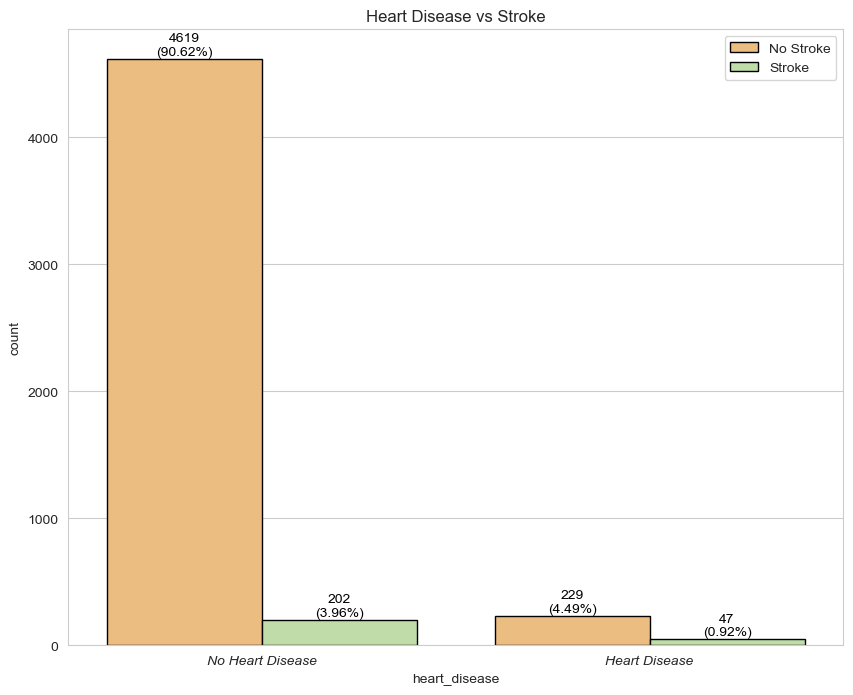

In [65]:
#Countplot depicting heart_disease and stroke correlation
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax = sns.countplot(x='heart_disease',hue="stroke",data=df, palette='Spectral', edgecolor = 'black', linewidth = 1)
plt.title('Heart Disease vs Stroke')
plt.xticks([0,1], ['No Heart Disease','Heart Disease'], style = 'italic') 
plt.legend(labels=['No Stroke','Stroke'])

#Add count and percentage on top of each bar
for p in ax.patches:
    height = p.get_height()
    count = int(height) if height.is_integer() else height  
    ax.annotate(f'{count}\n({height/len(df)*100:.2f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

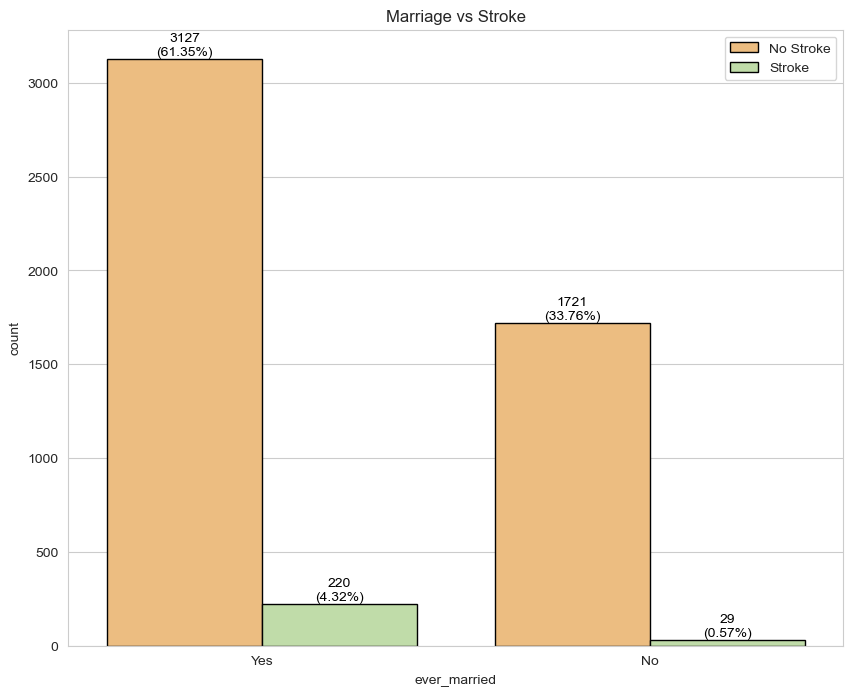

In [66]:
#Countplot depicting ever_married and stroke correlation
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax = sns.countplot(x='ever_married',hue="stroke",data=df, palette='Spectral', edgecolor = 'black', linewidth = 1)
plt.title('Marriage vs Stroke')
plt.legend(labels=['No Stroke','Stroke'])

#Add count and percentage on top of each bar
for p in ax.patches:
    height = p.get_height()
    count = int(height) if height.is_integer() else height  
    ax.annotate(f'{count}\n({height/len(df)*100:.2f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

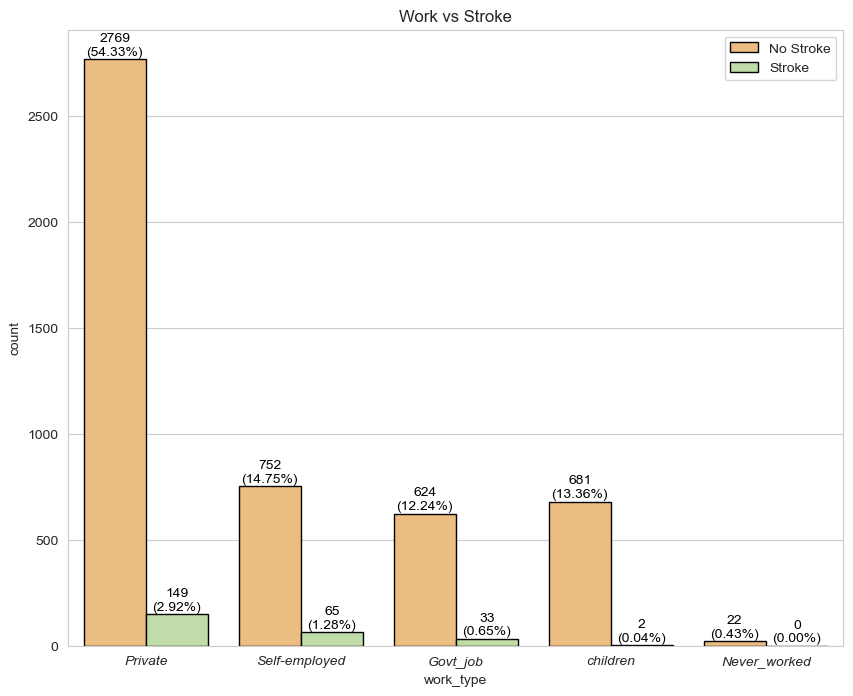

In [67]:
#Countplot depicting work_type and stroke correlation
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax = sns.countplot(x='work_type',hue="stroke",data=df, palette='Spectral', edgecolor = 'black', linewidth = 1)
plt.title('Work vs Stroke') 
plt.xticks(style = 'italic')
plt.legend(labels=['No Stroke','Stroke'])

#Add count and percentage on top of each bar
for p in ax.patches:
    height = p.get_height()
    count = int(height) if height.is_integer() else height  
    ax.annotate(f'{count}\n({height/len(df)*100:.2f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

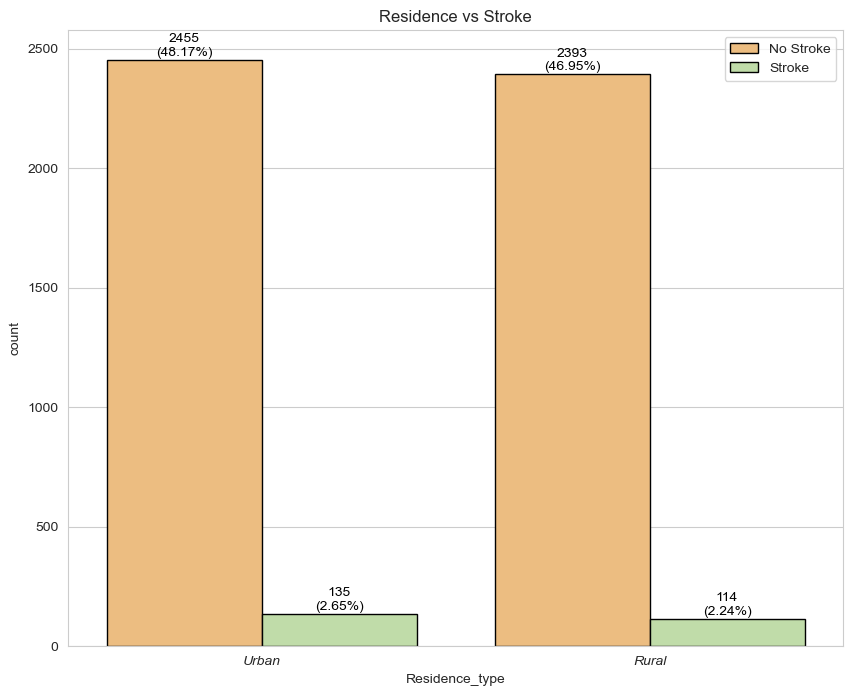

In [68]:
#Countplot depicting Residence_type and stroke correlation
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax = sns.countplot(x='Residence_type',hue="stroke",data=df, palette='Spectral', edgecolor = 'black', linewidth = 1)
plt.title('Residence vs Stroke')
plt.xticks(style = 'italic')
plt.legend(labels=['No Stroke','Stroke'])

#Add count and percentage on top of each bar
for p in ax.patches:
    height = p.get_height()
    count = int(height) if height.is_integer() else height  
    ax.annotate(f'{count}\n({height/len(df)*100:.2f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

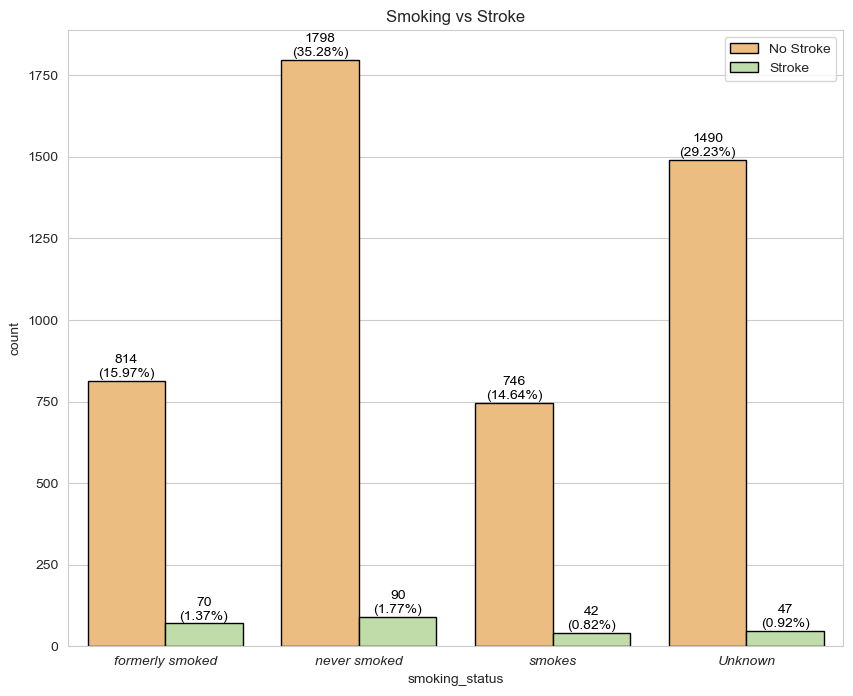

In [69]:
#Countplot depicting smoking_status and stroke correlation
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax = sns.countplot(x='smoking_status',hue="stroke",data=df, palette='Spectral', edgecolor = 'black', linewidth = 1)
plt.title('Smoking vs Stroke')
plt.xticks(style = 'italic')
plt.legend(labels=['No Stroke','Stroke'])

#Add count and percentage on top of each bar
for p in ax.patches:
    height = p.get_height()
    count = int(height) if height.is_integer() else height  
    ax.annotate(f'{count}\n({height/len(df)*100:.2f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

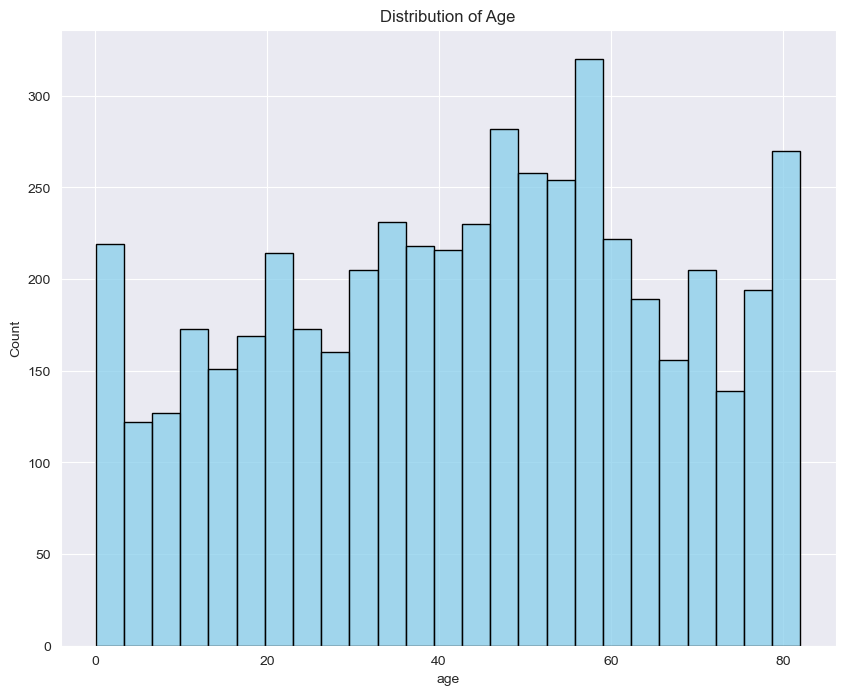

In [70]:
#Histogram which reflects the Age distribution
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.histplot(data=df, x='age', bins = 25, color='skyblue', edgecolor = 'black', linewidth = 1)
plt.title('Distribution of Age')
plt.show()

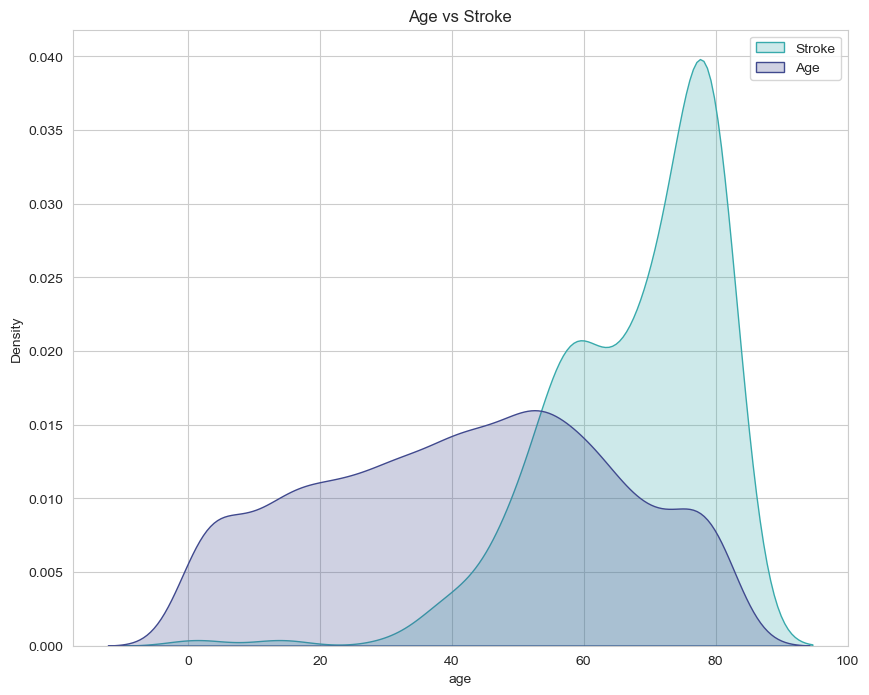

In [71]:
#KDE plot which reflects the age vs stroke correlation
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.kdeplot(data=df, x='age', hue='stroke', fill=True, common_norm=False, palette='mako')
plt.legend(labels=['Stroke','Age'])
plt.title('Age vs Stroke')
plt.show()

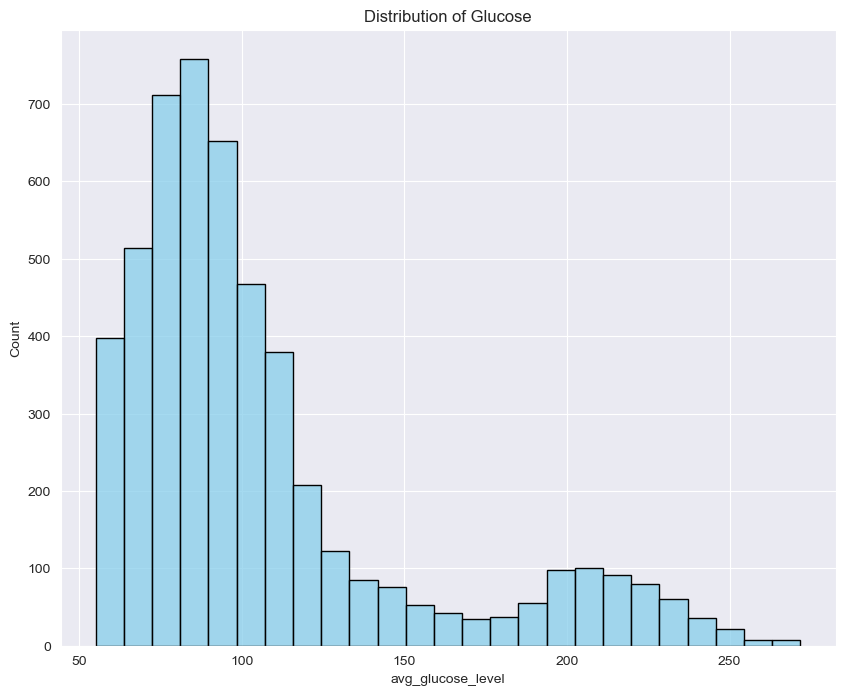

In [72]:
#Histogram which reflects the gluclose distribution
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.histplot(data=df, x='avg_glucose_level', bins = 25, color='skyblue', edgecolor = 'black', linewidth = 1)
plt.title('Distribution of Glucose')
plt.show()

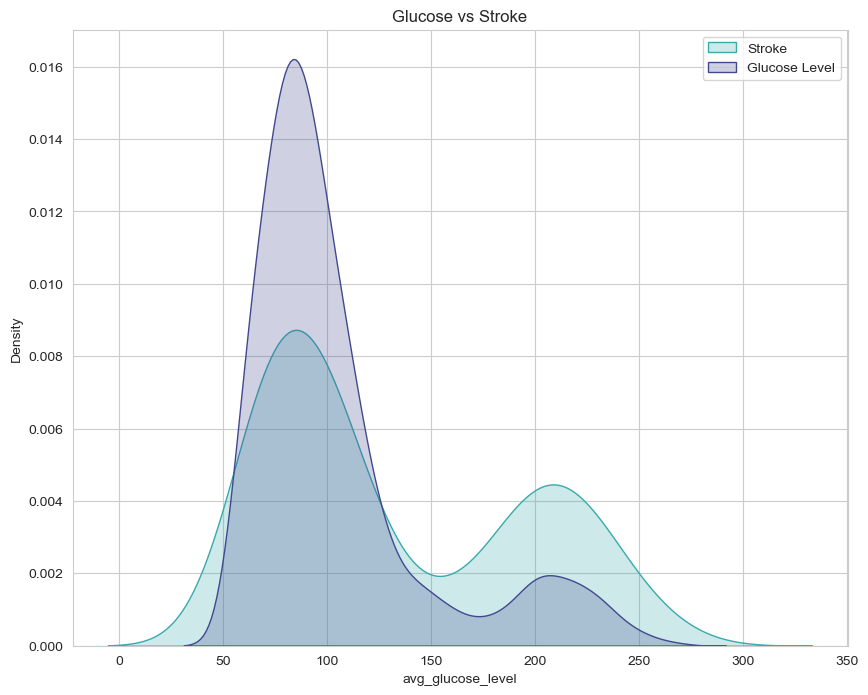

In [73]:
#KDE plot which reflects the glucose level vs stroke correlation
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', fill=True, common_norm=False, palette='mako')
plt.legend(labels=['Stroke','Glucose Level'])
plt.title('Glucose vs Stroke')
plt.show()

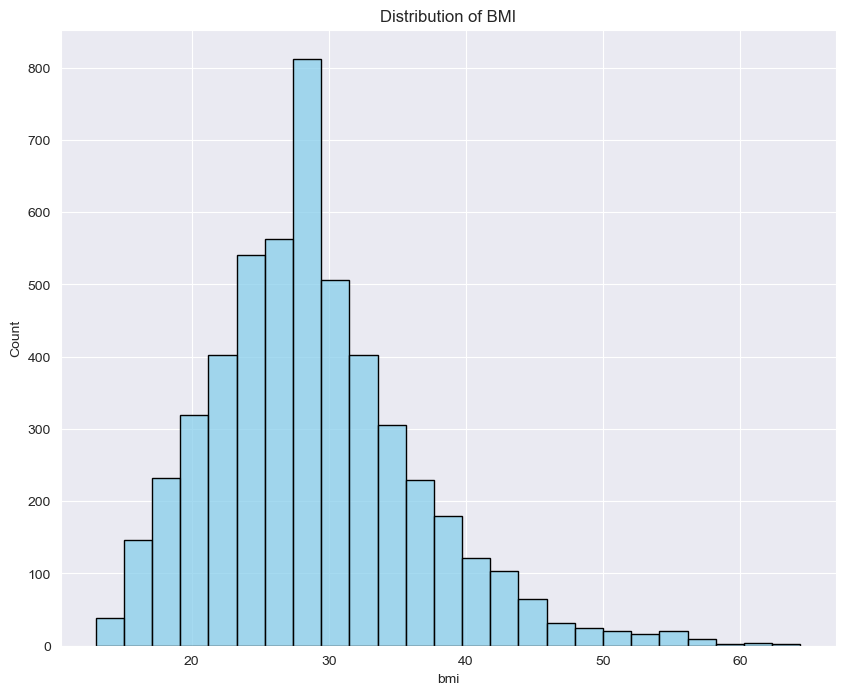

In [74]:
#Histogram which reflects the bmi distribution
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.histplot(data=df, x='bmi', bins = 25, color='skyblue', edgecolor = 'black', linewidth = 1)
plt.title('Distribution of BMI')
plt.show()

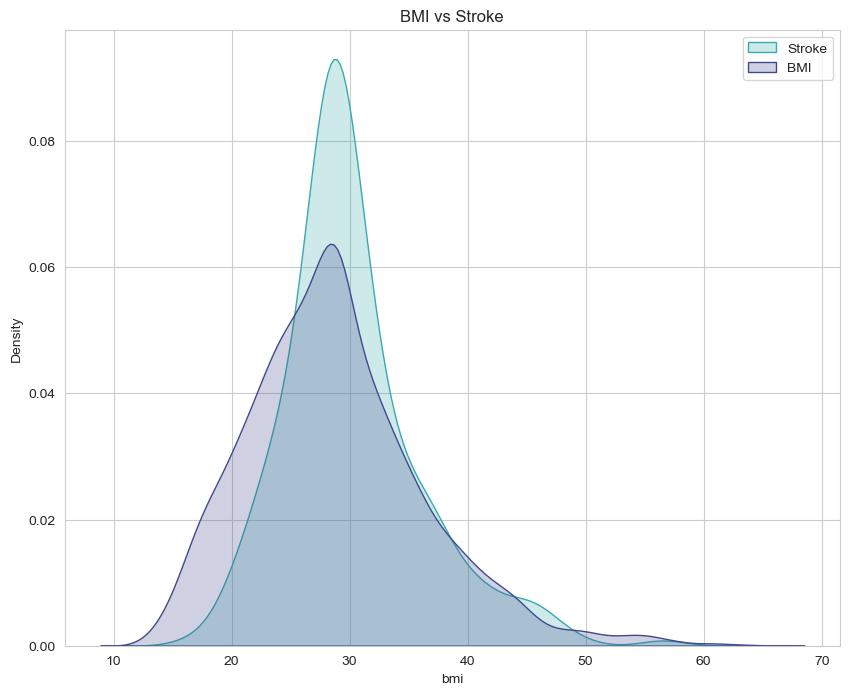

In [75]:
#KDE plot which reflects the bmi vs stroke correlation
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.kdeplot(data=df, x='bmi', hue='stroke', fill=True, common_norm=False, palette='mako')
plt.legend(labels=['Stroke','BMI'])
plt.title('BMI vs Stroke')
plt.show()

In [14]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

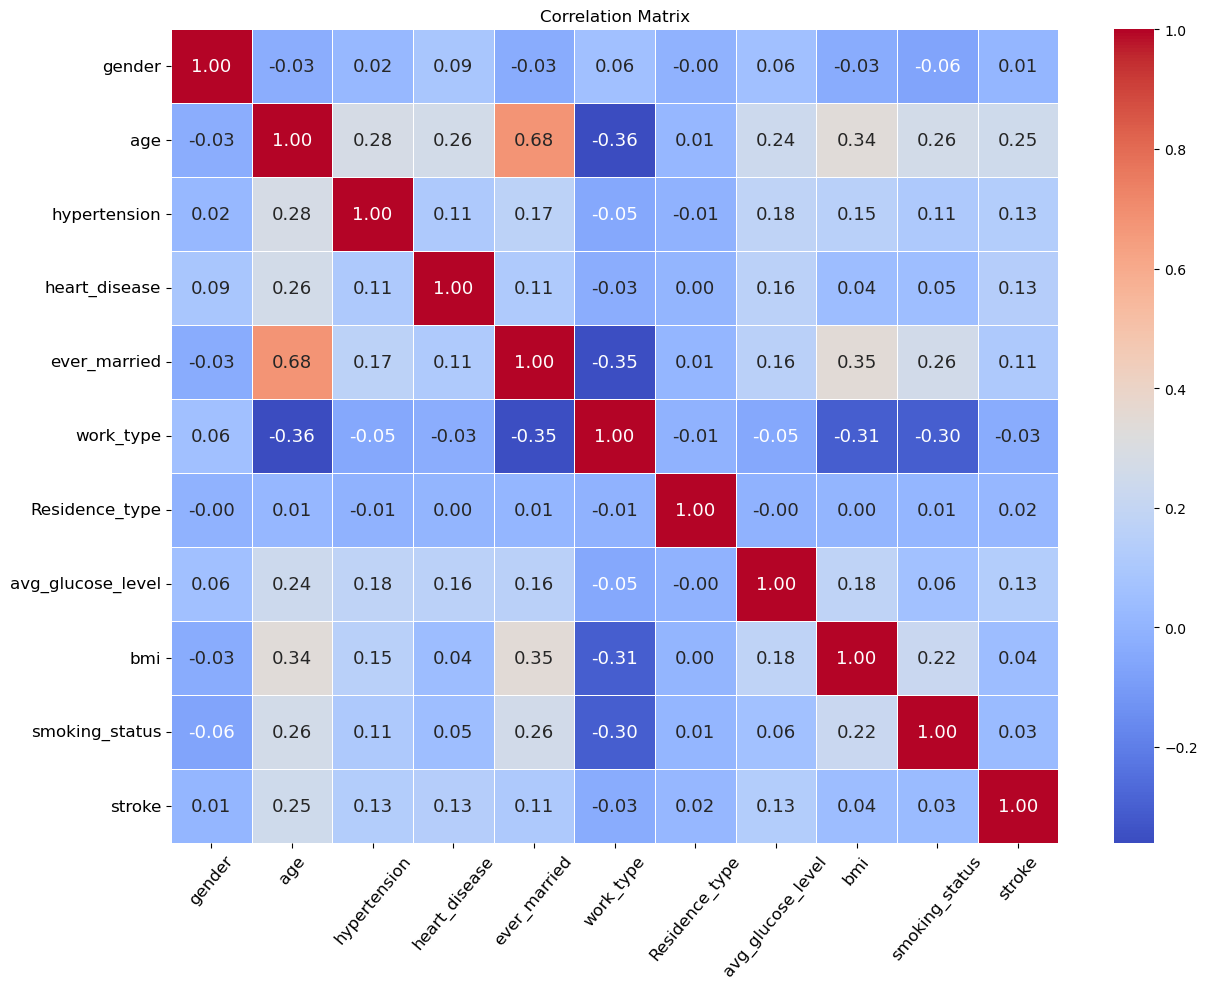

In [15]:
#Create a copy of df
df1 = df.copy()

#Initialize label encoder
le = LabelEncoder()
#Encode categorical variables
df1['gender'] = le.fit_transform(df1['gender'])
df1['ever_married'] = le.fit_transform(df1['ever_married'])
df1['work_type'] = le.fit_transform(df1['work_type'])
df1['Residence_type'] = le.fit_transform(df1['Residence_type'])
df1['smoking_status'] = le.fit_transform(df1['smoking_status'])

#Data correlations between all features
plt.figure(figsize=(13,10))
sns.heatmap(df1.corr(numeric_only = True),annot=True, fmt = ".2f", cmap = "coolwarm", linewidths=0.5, annot_kws={"size":13})
plt.title('Correlation Matrix')
plt.yticks(rotation= 0, fontsize = 12)
plt.xticks(rotation=50,fontsize = 12)
plt.tight_layout()
plt.show()

In [77]:
#Dropping smoking_status 
df.drop('smoking_status',axis=1,inplace=True) 
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1


In [78]:
#Converting categorical to numerical data
df = pd.get_dummies(df, columns =  ['gender', 'ever_married', 'work_type', 'Residence_type'])

In [79]:
#Feature-splitting
X = df.drop('stroke', axis = 1)
y = df['stroke']

In [80]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [81]:
#Apply SMOTEENN to balance the stroke class
smoteenn = SMOTEENN(random_state=42)
X_train, y_train = smoteenn.fit_resample(X_train, y_train)
print('After Balancing:')
print('X balanced shape:', X_train.shape)
print('y balanced shape:', y_train.shape)

After Balancing:
X balanced shape: (6606, 16)
y balanced shape: (6606,)


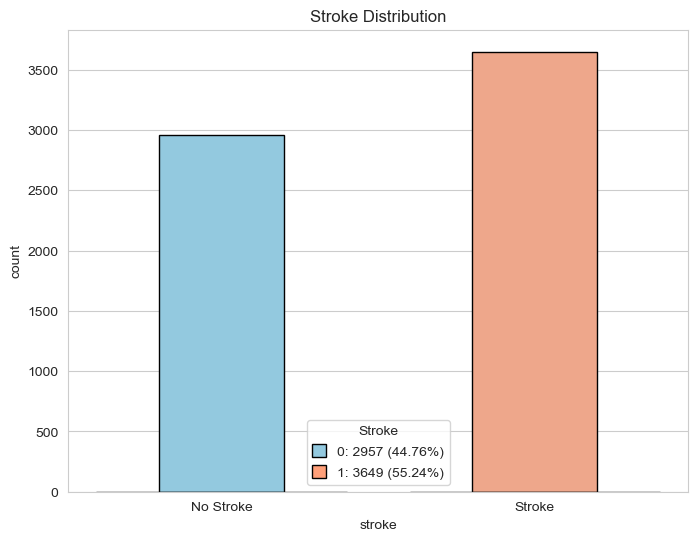

In [82]:
#Countplot depicting Stroke Distribution

#Balanced df
df_balanced = pd.DataFrame()
df_balanced[X.columns] = X_train
df_balanced['stroke'] = y_train

#Calculate counts for each option
counts = df_balanced['stroke'].value_counts()

#Define colors for each option
colors = {0: 'skyblue', 1: 'lightsalmon'}

#Configure countplot
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.countplot(x='stroke', data=df_balanced, palette=colors, edgecolor='black', linewidth=1, width=0.4)
plt.title('Stroke Distribution')
plt.xticks([0,1], ['No Stroke', 'Stroke']) 

#Add legend with counts and percentages
legend_labels = []
for i, count in enumerate(counts):
    label_text = f'{1-i}: {count} ({(count/df_balanced.shape[0]*100):.2f}%)'
    legend_labels.append(label_text)
    plt.bar(i, 0, color=colors[1-i], label=label_text)

#Customize legend handles 
handles, _ = ax.get_legend_handles_labels()
for handle in handles:
    for patch in handle.patches:
        patch.set_edgecolor('black')

plt.legend(title='Stroke', loc='lower center', labels=legend_labels[::-1], handlelength=1, handleheight=1)
plt.show()

In [83]:
#Feature Scaling
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [84]:
#Validating feature scaling
X_train_std

array([[-0.22384356, -0.26972373, -0.1966704 , ..., -0.301063  ,
        -0.73255473,  1.22489938],
       [-1.27033227, -0.26972373, -0.1966704 , ..., -0.301063  ,
        -0.73255473,  1.22489938],
       [-1.57555814, -0.26972373, -0.1966704 , ..., -0.301063  ,
         1.36508573, -0.81639359],
       ...,
       [ 1.08363947, -0.26972373, -0.1966704 , ..., -0.301063  ,
        -0.73255473,  1.22489938],
       [ 0.21800202, -0.26972373, -0.1966704 , ..., -0.301063  ,
        -0.73255473, -0.81639359],
       [-0.30265579, -0.26972373, -0.1966704 , ..., -0.301063  ,
         1.36508573, -0.81639359]])

In [85]:
#Validating feature scaling
X_test_std

array([[-0.8342953 , -0.26972373, -0.1966704 , ..., -0.301063  ,
        -0.73255473,  1.22489938],
       [ 0.73543776, -0.26972373, -0.1966704 , ..., -0.301063  ,
        -0.73255473,  1.22489938],
       [-0.22384356, -0.26972373, -0.1966704 , ..., -0.301063  ,
        -0.73255473,  1.22489938],
       ...,
       [-0.13663617, -0.26972373, -0.1966704 , ..., -0.301063  ,
        -0.73255473,  1.22489938],
       [ 0.69183406, -0.26972373, -0.1966704 , ..., -0.301063  ,
         1.36508573, -0.81639359],
       [-0.65988052, -0.26972373, -0.1966704 , ..., -0.301063  ,
        -0.73255473,  1.22489938]])

In [86]:
def evaluation(model, X_train_std, y_train, X_test_std, y_test, train=True, cv=5):
    if train:
        #Perform stratified k-fold cross-validation on training data
        skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
        cv_scores_train = cross_val_score(model, X_train_std, y_train, cv=skf, scoring='accuracy')
        scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
        cv_results_train = cross_validate(model, X_train_std, y_train, cv=skf, scoring=scoring)

        #Print cross-validation results for training data
        print("")
        print("Stratified K-Fold Cross-Validation Results for Training Data (k={}):".format(cv))
        print("======================================================")
        print("Mean Accuracy: {:.2f}%".format(cv_results_train['test_accuracy'].mean() * 100))
        print("Mean Precision: {:.2f}".format(cv_results_train['test_precision_macro'].mean()))
        print("Mean Recall: {:.2f}".format(cv_results_train['test_recall_macro'].mean()))
        print("Mean F1-score: {:.2f}".format(cv_results_train['test_f1_macro'].mean()))
        print("_____________________________________________________")
        print()

        #Train the model on the full training data
        model.fit(X_train_std, y_train)

        #Evaluate the model on training data
        pred_train = model.predict(X_train_std)
        print("Train Result:\n=====================================================")
        print("Accuracy Score: {:.2f}%".format(accuracy_score(y_train, pred_train) * 100))
        print("Precision: {:.2f}".format(precision_score(y_train, pred_train, average='macro')))
        print("Recall: {:.2f}".format(recall_score(y_train, pred_train, average='macro')))
        print("F1 Score: {:.2f}".format(f1_score(y_train, pred_train, average='macro')))
        print("_____________________________________________________")
        print("CLASSIFICATION REPORT:\n{}".format(classification_report(y_train, pred_train)))
        print("_____________________________________________________")
        #Plot confusion matrix for training data
        cm_train = confusion_matrix(y_train, pred_train)
        plot_confusion_matrix(cm_train)
        print("\n\n\n")

    else:
        #Perform stratified k-fold cross-validation on testing data
        skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
        cv_scores_test = cross_val_score(model, X_test_std, y_test, cv=skf, scoring='accuracy')
        scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
        cv_results_test = cross_validate(model, X_test_std, y_test, cv=skf, scoring=scoring)

        #Print cross-validation results for testing data
        print("")
        print("Stratified K-Fold Cross-Validation Results for Testing Data (k={}):".format(cv))
        print("======================================================")
        print("Mean Accuracy: {:.2f}%".format(cv_results_test['test_accuracy'].mean() * 100))
        print("Mean Precision: {:.2f}".format(cv_results_test['test_precision_macro'].mean()))
        print("Mean Recall: {:.2f}".format(cv_results_test['test_recall_macro'].mean()))
        print("Mean F1-score: {:.2f}".format(cv_results_test['test_f1_macro'].mean()))
        print("_____________________________________________________")
        print()

        #Evaluate the model on test data
        pred_test = model.predict(X_test_std)
        print("Test Result:\n=====================================================")
        print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test, pred_test) * 100))
        print("Precision: {:.2f}".format(precision_score(y_test, pred_test, average='macro')))
        print("Recall: {:.2f}".format(recall_score(y_test, pred_test, average='macro')))
        print("F1 Score: {:.2f}".format(f1_score(y_test, pred_test, average='macro')))
        print("_____________________________________________________")
        print("CLASSIFICATION REPORT:\n{}".format(classification_report(y_test, pred_test)))
        print("_____________________________________________________")
        #Plot confusion matrix for test data
        cm_test = confusion_matrix(y_test, pred_test)
        plot_confusion_matrix(cm_test)
        
def plot_confusion_matrix(cm, labels=['No Stroke', 'Stroke'], fontsize=12):
    plt.figure(figsize=(5, 5))
    ax = plt.gca()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, cmap='coolwarm')

    #Remove default annotations
    for text in ax.texts:
        text.set_visible(False)

    #Annotate the cells with TP, TN, FP, FN counts
    tn, fp, fn, tp = cm.ravel()
    total = tn + fp + fn + tp
    plt.text(0, 0, f'TN\n{tn}\n({tn / total:.2%})', ha='center', va='center', color='white', fontsize=fontsize)
    plt.text(1, 0, f'FP\n{fp}\n({fp / total:.2%})', ha='center', va='center', color='white', fontsize=fontsize)
    plt.text(0, 1, f'FN\n{fn}\n({fn / total:.2%})', ha='center', va='center', color='white', fontsize=fontsize)
    plt.text(1, 1, f'TP\n{tp}\n({tp / total:.2%})', ha='center', va='center', color='white', fontsize=fontsize)

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.grid(False)
    plt.show()


Stratified K-Fold Cross-Validation Results for Training Data (k=5):
Mean Accuracy: 95.52%
Mean Precision: 0.95
Mean Recall: 0.96
Mean F1-score: 0.95
_____________________________________________________

Train Result:
Accuracy Score: 95.50%
Precision: 0.95
Recall: 0.96
F1 Score: 0.95
_____________________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2957
           1       0.97      0.95      0.96      3649

    accuracy                           0.96      6606
   macro avg       0.95      0.96      0.95      6606
weighted avg       0.96      0.96      0.96      6606

_____________________________________________________


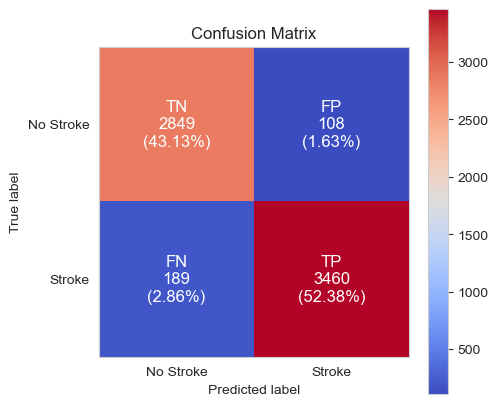






Stratified K-Fold Cross-Validation Results for Testing Data (k=5):
Mean Accuracy: 93.82%
Mean Precision: 0.50
Mean Recall: 0.51
Mean F1-score: 0.50
_____________________________________________________

Test Result:
Accuracy Score: 85.20%
Precision: 0.58
Recall: 0.66
F1 Score: 0.59
_____________________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       958
           1       0.19      0.45      0.27        62

    accuracy                           0.85      1020
   macro avg       0.58      0.66      0.59      1020
weighted avg       0.91      0.85      0.88      1020

_____________________________________________________


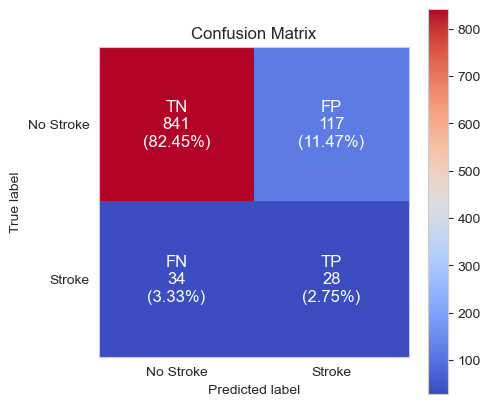

In [87]:
#Supervised Machine Learning Algorithm: Logistic Regression
lr = LogisticRegression()
#Fitting the model with training data
lr.fit(X_train_std, y_train)

#Evaluate the model on the training data
evaluation(lr, X_train_std, y_train, X_test_std, y_test, train=True)
#Evaluate the model on the testing data
evaluation(lr, X_train_std, y_train, X_test_std, y_test, train=False)


Stratified K-Fold Cross-Validation Results for Training Data (k=5):
Mean Accuracy: 95.85%
Mean Precision: 0.96
Mean Recall: 0.96
Mean F1-score: 0.96
_____________________________________________________

Train Result:
Accuracy Score: 96.37%
Precision: 0.96
Recall: 0.97
F1 Score: 0.96
_____________________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2957
           1       0.99      0.95      0.97      3649

    accuracy                           0.96      6606
   macro avg       0.96      0.97      0.96      6606
weighted avg       0.96      0.96      0.96      6606

_____________________________________________________


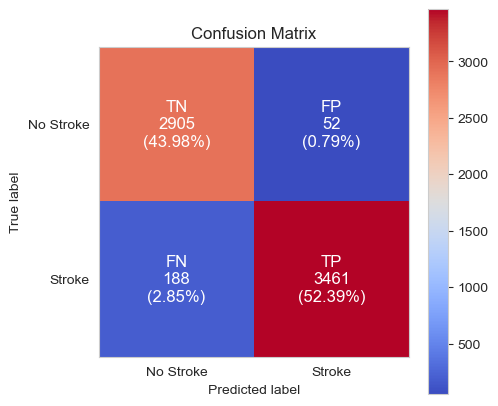






Stratified K-Fold Cross-Validation Results for Testing Data (k=5):
Mean Accuracy: 93.92%
Mean Precision: 0.47
Mean Recall: 0.50
Mean F1-score: 0.48
_____________________________________________________

Test Result:
Accuracy Score: 87.84%
Precision: 0.54
Recall: 0.56
F1 Score: 0.55
_____________________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       958
           1       0.14      0.19      0.16        62

    accuracy                           0.88      1020
   macro avg       0.54      0.56      0.55      1020
weighted avg       0.90      0.88      0.89      1020

_____________________________________________________


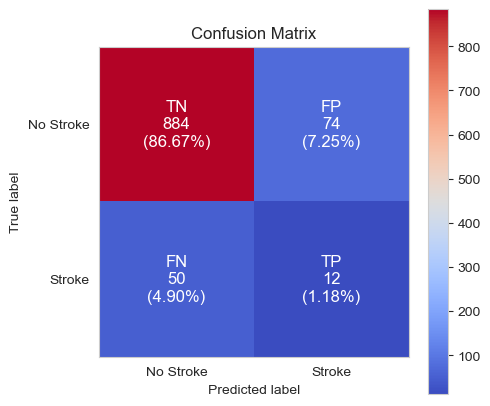

In [107]:
#Supervised Machine Learning Algorithm: Support Vector Machine
svm = SVC()
#Fitting the model with training data
svm.fit(X_train_std, y_train)

#Evaluate the model on the training data
evaluation(svm, X_train_std, y_train, X_test_std, y_test, train=True)
#Evaluate the model on the testing data
evaluation(svm, X_train_std, y_train, X_test_std, y_test, train=False)


Stratified K-Fold Cross-Validation Results for Training Data (k=5):
Mean Accuracy: 96.41%
Mean Precision: 0.96
Mean Recall: 0.96
Mean F1-score: 0.96
_____________________________________________________

Train Result:
Accuracy Score: 97.49%
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
_____________________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2957
           1       0.98      0.97      0.98      3649

    accuracy                           0.97      6606
   macro avg       0.97      0.97      0.97      6606
weighted avg       0.97      0.97      0.97      6606

_____________________________________________________


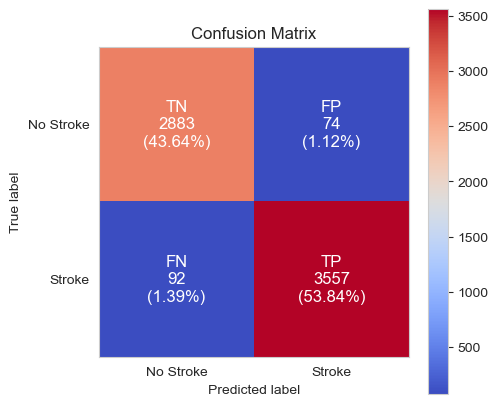






Stratified K-Fold Cross-Validation Results for Testing Data (k=5):
Mean Accuracy: 93.43%
Mean Precision: 0.47
Mean Recall: 0.50
Mean F1-score: 0.48
_____________________________________________________

Test Result:
Accuracy Score: 86.86%
Precision: 0.54
Recall: 0.57
F1 Score: 0.55
_____________________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       958
           1       0.14      0.23      0.17        62

    accuracy                           0.87      1020
   macro avg       0.54      0.57      0.55      1020
weighted avg       0.90      0.87      0.88      1020

_____________________________________________________


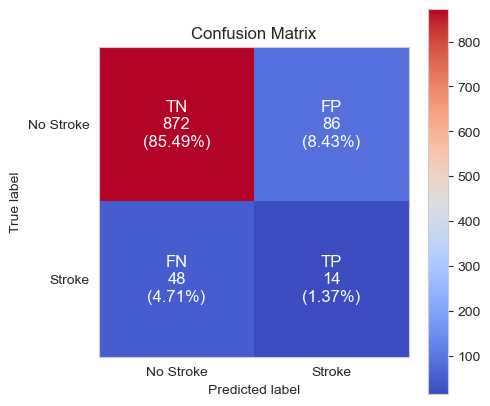

In [89]:
#Supervised Machine Learning Algorithm: K-Nearest Neighbour(KNN)
knn = KNeighborsClassifier()
#Fitting the model with training data
knn.fit(X_train_std, y_train)

#Evaluate the model on the training data
evaluation(knn, X_train_std, y_train, X_test_std, y_test, train=True)
#Evaluate the model on the testing data
evaluation(knn, X_train_std, y_train, X_test_std, y_test, train=False)


Stratified K-Fold Cross-Validation Results for Training Data (k=5):
Mean Accuracy: 95.79%
Mean Precision: 0.96
Mean Recall: 0.96
Mean F1-score: 0.96
_____________________________________________________

Train Result:
Accuracy Score: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
_____________________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2957
           1       1.00      1.00      1.00      3649

    accuracy                           1.00      6606
   macro avg       1.00      1.00      1.00      6606
weighted avg       1.00      1.00      1.00      6606

_____________________________________________________


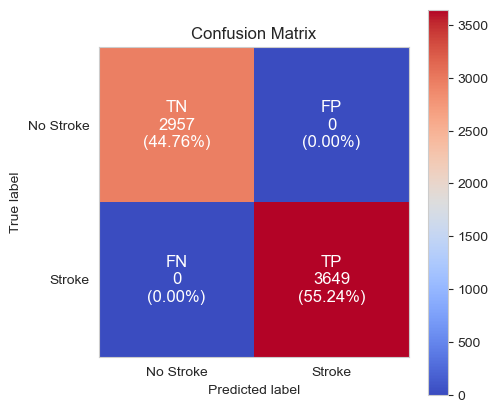






Stratified K-Fold Cross-Validation Results for Testing Data (k=5):
Mean Accuracy: 89.02%
Mean Precision: 0.55
Mean Recall: 0.58
Mean F1-score: 0.56
_____________________________________________________

Test Result:
Accuracy Score: 85.49%
Precision: 0.59
Recall: 0.69
F1 Score: 0.61
_____________________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       958
           1       0.21      0.50      0.30        62

    accuracy                           0.85      1020
   macro avg       0.59      0.69      0.61      1020
weighted avg       0.92      0.85      0.88      1020

_____________________________________________________


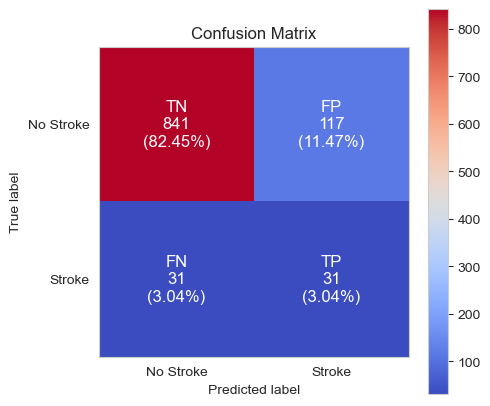

In [100]:
#Supervised Machine Learning Algorithm: Decision Tree 
dt = DecisionTreeClassifier()
#Fitting the model with training data
dt.fit(X_train_std, y_train)

#Evaluate the model on the training data
evaluation(dt, X_train_std, y_train, X_test_std, y_test, train=True)
#Evaluate the model on the testing data
evaluation(dt, X_train_std, y_train, X_test_std, y_test, train=False)


Stratified K-Fold Cross-Validation Results for Training Data (k=5):
Mean Accuracy: 97.61%
Mean Precision: 0.98
Mean Recall: 0.98
Mean F1-score: 0.98
_____________________________________________________

Train Result:
Accuracy Score: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
_____________________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2957
           1       1.00      1.00      1.00      3649

    accuracy                           1.00      6606
   macro avg       1.00      1.00      1.00      6606
weighted avg       1.00      1.00      1.00      6606

_____________________________________________________


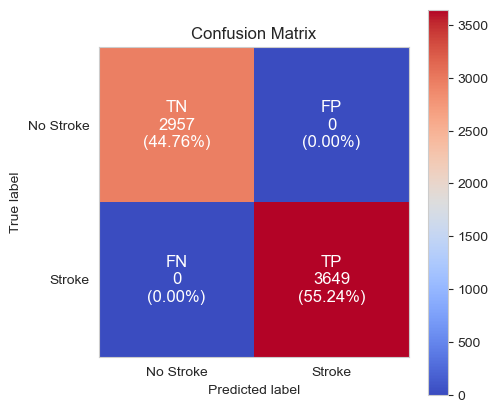






Stratified K-Fold Cross-Validation Results for Testing Data (k=5):
Mean Accuracy: 93.73%
Mean Precision: 0.52
Mean Recall: 0.51
Mean F1-score: 0.50
_____________________________________________________

Test Result:
Accuracy Score: 88.14%
Precision: 0.59
Recall: 0.66
F1 Score: 0.61
_____________________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       958
           1       0.23      0.40      0.29        62

    accuracy                           0.88      1020
   macro avg       0.59      0.66      0.61      1020
weighted avg       0.92      0.88      0.90      1020

_____________________________________________________


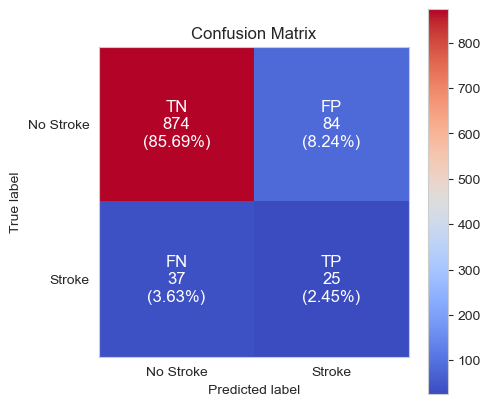

In [97]:
#Supervised Machine Learning Algorithm: Random Forest Classifier
rfc = RandomForestClassifier()
#Fitting the model with training data
rfc.fit(X_train_std, y_train)

#Evaluate the model on the training data
evaluation(rfc, X_train_std, y_train, X_test_std, y_test, train=True)
#Evaluate the model on the testing data
evaluation(rfc, X_train_std, y_train, X_test_std, y_test, train=False)

In [103]:
#Calculate scores for each model
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test_std)) * 100, 2)
test_score_svm = round(accuracy_score(y_test, svm.predict(X_test_std)) * 100, 2)
test_score_knn = round(accuracy_score(y_test, knn.predict(X_test_std)) * 100, 2)
test_score_dt = round(accuracy_score(y_test, dt.predict(X_test_std)) * 100, 2)
test_score_rfc = round(accuracy_score(y_test, rfc.predict(X_test_std)) * 100, 2)

test_precision_lr = round(precision_score(y_test, lr.predict(X_test_std), average='macro') * 100, 2)
test_precision_svm = round(precision_score(y_test, svm.predict(X_test_std), average='macro') * 100, 2)
test_precision_knn = round(precision_score(y_test, knn.predict(X_test_std), average='macro') * 100, 2)
test_precision_dt = round(precision_score(y_test, dt.predict(X_test_std), average='macro') * 100, 2)
test_precision_rfc = round(precision_score(y_test, rfc.predict(X_test_std), average='macro') * 100, 2)

test_recall_lr = round(recall_score(y_test, lr.predict(X_test_std), average='macro') * 100, 2)
test_recall_svm = round(recall_score(y_test, svm.predict(X_test_std), average='macro') * 100, 2)
test_recall_knn = round(recall_score(y_test, knn.predict(X_test_std), average='macro') * 100, 2)
test_recall_dt = round(recall_score(y_test, dt.predict(X_test_std), average='macro') * 100, 2)
test_recall_rfc = round(recall_score(y_test, rfc.predict(X_test_std), average='macro') * 100, 2)

test_f1_lr = round(f1_score(y_test, lr.predict(X_test_std), average='macro') * 100, 2)
test_f1_svm = round(f1_score(y_test, svm.predict(X_test_std), average='macro') * 100, 2)
test_f1_knn = round(f1_score(y_test, knn.predict(X_test_std), average='macro') * 100, 2)
test_f1_dt = round(f1_score(y_test, dt.predict(X_test_std), average='macro') * 100, 2)
test_f1_rfc = round(f1_score(y_test, rfc.predict(X_test_std), average='macro') * 100, 2)

##Variable to display model results
models = {
    'Test Accuracy': [test_score_lr, test_score_svm, test_score_knn, test_score_dt, test_score_rfc],
    'Test Precision': [test_precision_lr, test_precision_svm, test_precision_knn, test_precision_dt, test_precision_rfc],
    'Test Recall': [test_recall_lr, test_recall_svm, test_recall_knn, test_recall_dt, test_recall_rfc],
    'Test F1 Score': [test_f1_lr, test_f1_svm, test_f1_knn, test_f1_dt, test_f1_rfc]
}

models = pd.DataFrame(models, index=['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbour',
                                     'Decision Tree Classifier', 'Random Forest Classifier'])

#Display results
models.head()

,Test Accuracy,Test Precision,Test Recall,Test F1 Score
Logistic Regression,85.20,57.71,66.47,59.41
Support Vector Machine,87.84,54.30,55.82,54.83
K-Nearest Neighbour,86.86,54.39,56.80,55.07
Decision Tree Classifier,85.49,58.70,68.89,60.72
Random Forest Classifier,88.14,59.44,65.78,61.38


In [185]:
#Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg', 'newton-cholesky'],
    'class_weight': ['balanced', None]
}

#Perform grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1500), param_grid, cv=5, scoring='accuracy')
#Fit grid search with training data
grid_search.fit(X_train_std, y_train)

#Get the best hyperparameters
best_params = grid_search.best_params_

#Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}



Stratified K-Fold Cross-Validation Results for Testing Data (k=5):
Mean Accuracy: 72.25%
Mean Precision: 0.56
Mean Recall: 0.73
Mean F1-score: 0.54
_____________________________________________________

Test Result:
Accuracy Score: 86.27%
Precision: 0.58
Recall: 0.66
F1 Score: 0.60
_____________________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       958
           1       0.20      0.44      0.28        62

    accuracy                           0.86      1020
   macro avg       0.58      0.66      0.60      1020
weighted avg       0.91      0.86      0.88      1020

_____________________________________________________


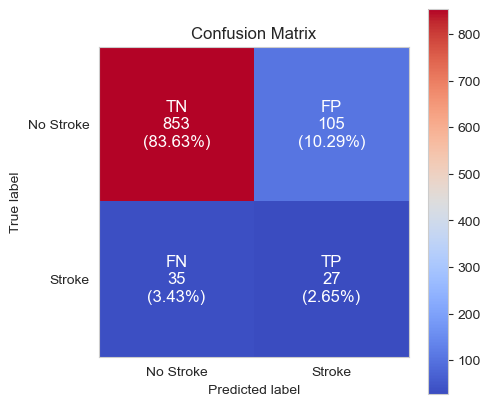

In [186]:
#Tuned logistic regression model with the best hyperparameters
tuned_lr = LogisticRegression(**best_params, max_iter=1500)

#Fit the model to your training data
tuned_lr.fit(X_train_std, y_train)

#Evaluate the model on the testing data
evaluation(tuned_lr, X_train_std, y_train, X_test_std, y_test, train=False)

In [104]:
#Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 'scale', 'auto'],
    'class_weight': ['balanced', None]
}

#Perform grid search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
#Fit grid search with training data
grid_search.fit(X_train_std, y_train)

#Get the best hyperparameters
best_params = grid_search.best_params_

#Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'C': 10, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}



Stratified K-Fold Cross-Validation Results for Testing Data (k=5):
Mean Accuracy: 78.92%
Mean Precision: 0.50
Mean Recall: 0.50
Mean F1-score: 0.48
_____________________________________________________

Test Result:
Accuracy Score: 88.33%
Precision: 0.58
Recall: 0.61
F1 Score: 0.59
_____________________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       958
           1       0.20      0.31      0.24        62

    accuracy                           0.88      1020
   macro avg       0.58      0.61      0.59      1020
weighted avg       0.91      0.88      0.89      1020

_____________________________________________________


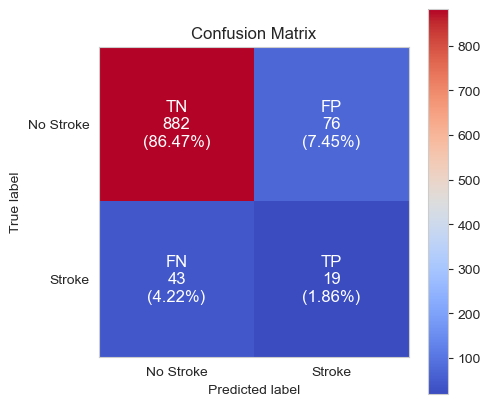

In [106]:
#Tuned support vector machine model with the best hyperparameters
tuned_svm = SVC(**best_params)

#Fit the model with training data
tuned_svm.fit(X_train_std, y_train)

#Evaluate the model on the testing data
evaluation(tuned_svm, X_train_std, y_train, X_test_std, y_test, train=False)

In [174]:
#Define the hyperparameter grid
param_grid = {
    'n_neighbors': list(range(1, 31)),  #Range of neighbors from 1 to 30
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski', 'hamming']
  
}

#Perform grid search with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
#Fit grid search with training data
grid_search.fit(X_train_std, y_train)

#Get the best hyperparameters
best_params = grid_search.best_params_

#Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}



Stratified K-Fold Cross-Validation Results for Testing Data (k=5):
Mean Accuracy: 93.33%
Mean Precision: 0.47
Mean Recall: 0.50
Mean F1-score: 0.48
_____________________________________________________

Test Result:
Accuracy Score: 90.10%
Precision: 0.57
Recall: 0.58
F1 Score: 0.58
_____________________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       958
           1       0.20      0.21      0.20        62

    accuracy                           0.90      1020
   macro avg       0.57      0.58      0.58      1020
weighted avg       0.90      0.90      0.90      1020

_____________________________________________________


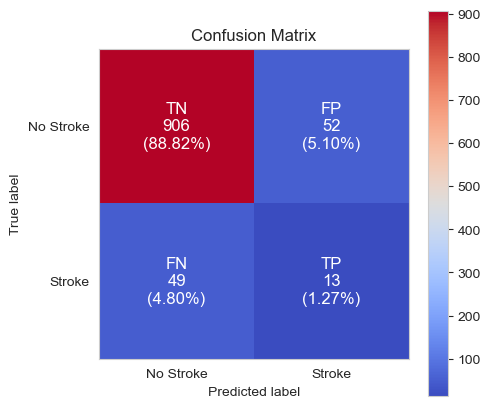

In [175]:
#Tuned K-Nearest Neighbor (KNN) with the best hyperparameters
tuned_knn = KNeighborsClassifier(**best_params)

#Fit the model with training data
tuned_knn.fit(X_train_std, y_train)

#Evaluate the model on the testing data
evaluation(tuned_knn, X_train_std, y_train, X_test_std, y_test, train=False)

In [116]:
#Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  
    'min_samples_split': [2, 5, 10, 20],  
    'min_samples_leaf': [1, 2, 4, 8],  
    'max_features': ['auto', 'sqrt', 'log2', None],  
    'class_weight': ['balanced', None]  
}

#Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
#Fit grid search with training data
grid_search.fit(X_train_std, y_train)

#Get the best hyperparameters
best_params = grid_search.best_params_

#Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'class_weight': None, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}



Stratified K-Fold Cross-Validation Results for Testing Data (k=5):
Mean Accuracy: 89.61%
Mean Precision: 0.56
Mean Recall: 0.57
Mean F1-score: 0.56
_____________________________________________________

Test Result:
Accuracy Score: 86.08%
Precision: 0.59
Recall: 0.70
F1 Score: 0.62
_____________________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       958
           1       0.22      0.52      0.31        62

    accuracy                           0.86      1020
   macro avg       0.59      0.70      0.62      1020
weighted avg       0.92      0.86      0.89      1020

_____________________________________________________


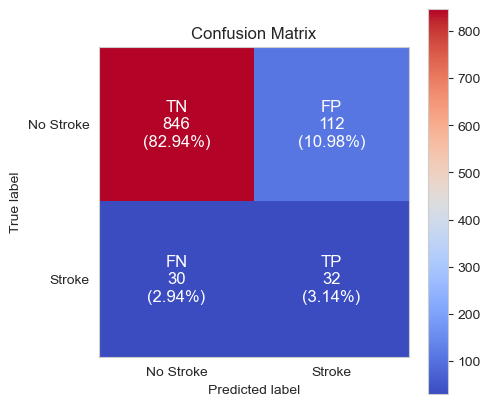

In [171]:
#Tuned Decision Tree Classifier with the best hyperparameters
tuned_dt = DecisionTreeClassifier(**best_params)

#Fit the model with training data
tuned_dt.fit(X_train_std, y_train)

#Evaluate the model on the testing data
evaluation(tuned_dt, X_train_std, y_train, X_test_std, y_test, train=False)

In [179]:
#Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10, 20], 
    'min_samples_leaf': [1, 2, 4, 8],  
    'max_features': ['auto', 'sqrt', 'log2']  
}

#Perform grid search with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
#Fit grid search with training data
grid_search.fit(X_train_std, y_train)

#Get the best hyperparameters
best_params = grid_search.best_params_

#Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}



Stratified K-Fold Cross-Validation Results for Testing Data (k=5):
Mean Accuracy: 93.73%
Mean Precision: 0.57
Mean Recall: 0.51
Mean F1-score: 0.50
_____________________________________________________

Test Result:
Accuracy Score: 88.43%
Precision: 0.59
Recall: 0.65
F1 Score: 0.61
_____________________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       958
           1       0.23      0.39      0.29        62

    accuracy                           0.88      1020
   macro avg       0.59      0.65      0.61      1020
weighted avg       0.91      0.88      0.90      1020

_____________________________________________________


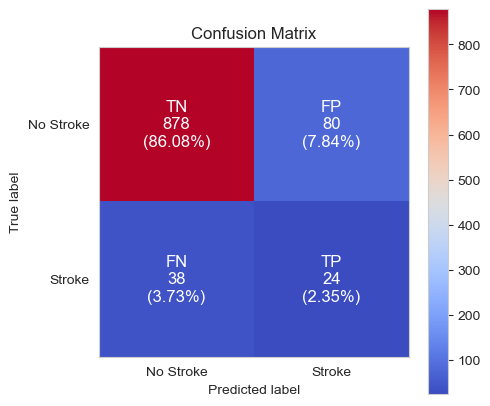

In [181]:
#Tuned Random Forest Classifier with the best hyperparameters
tuned_rfc = RandomForestClassifier(**best_params)

#Fit the model with training data
tuned_rfc.fit(X_train_std, y_train)

#Evaluate the model on the testing data
evaluation(tuned_rfc, X_train_std, y_train, X_test_std, y_test, train=False)

In [200]:
#Calculate scores for each tuned model
test_score_tuned_lr = round(accuracy_score(y_test, tuned_lr.predict(X_test_std)) * 100, 2)
test_score_tuned_svm = round(accuracy_score(y_test, tuned_svm.predict(X_test_std)) * 100, 2)
test_score_tuned_knn = round(accuracy_score(y_test, tuned_knn.predict(X_test_std)) * 100, 2)
test_score_tuned_dt = round(accuracy_score(y_test, tuned_dt.predict(X_test_std)) * 100, 2)
test_score_tuned_rfc = round(accuracy_score(y_test, tuned_rfc.predict(X_test_std)) * 100, 2)

test_precision_tuned_lr = round(precision_score(y_test, tuned_lr.predict(X_test_std), average='macro') * 100, 2)
test_precision_tuned_svm = round(precision_score(y_test, tuned_svm.predict(X_test_std), average='macro') * 100, 2)
test_precision_tuned_knn = round(precision_score(y_test, tuned_knn.predict(X_test_std), average='macro') * 100, 2)
test_precision_tuned_dt = round(precision_score(y_test, tuned_dt.predict(X_test_std), average='macro') * 100, 2)
test_precision_tuned_rfc = round(precision_score(y_test, tuned_rfc.predict(X_test_std), average='macro') * 100, 2)

test_recall_tuned_lr = round(recall_score(y_test, tuned_lr.predict(X_test_std), average='macro') * 100, 2)
test_recall_tuned_svm = round(recall_score(y_test, tuned_svm.predict(X_test_std), average='macro') * 100, 2)
test_recall_tuned_knn = round(recall_score(y_test, tuned_knn.predict(X_test_std), average='macro') * 100, 2)
test_recall_tuned_dt = round(recall_score(y_test, tuned_dt.predict(X_test_std), average='macro') * 100, 2)
test_recall_tuned_rfc = round(recall_score(y_test, tuned_rfc.predict(X_test_std), average='macro') * 100, 2)

test_f1_tuned_lr = round(f1_score(y_test, tuned_lr.predict(X_test_std), average='macro') * 100, 2)
test_f1_tuned_svm = round(f1_score(y_test, tuned_svm.predict(X_test_std), average='macro') * 100, 2)
test_f1_tuned_knn = round(f1_score(y_test, tuned_knn.predict(X_test_std), average='macro') * 100, 2)
test_f1_tuned_dt = round(f1_score(y_test, tuned_dt.predict(X_test_std), average='macro') * 100, 2)
test_f1_tuned_rfc = round(f1_score(y_test, tuned_rfc.predict(X_test_std), average='macro') * 100, 2)

#Create a DataFrame for tuned model results
tuned_results = {
    'Test Accuracy': [test_score_tuned_lr, test_score_tuned_svm, test_score_tuned_knn, test_score_tuned_dt, test_score_tuned_rfc],
    'Test Precision': [test_precision_tuned_lr, test_precision_tuned_svm, test_precision_tuned_knn, test_precision_tuned_dt, test_precision_tuned_rfc],
    'Test Recall': [test_recall_tuned_lr, test_recall_tuned_svm, test_recall_tuned_knn, test_recall_tuned_dt, test_recall_tuned_rfc],
    'Test F1 Score': [test_f1_tuned_lr, test_f1_tuned_svm, test_f1_tuned_knn, test_f1_tuned_dt, test_f1_tuned_rfc]
}

#Index for model names
model_names = ['Tuned Logistic Regression', 'Tuned Support Vector Machine', 'Tuned K-Nearest Neighbour',
                                     'Tuned Decision Tree Classifier', 'Tuned Random Forest Classifier']

#Create the DataFrame
tuned_models = pd.DataFrame(tuned_results, index=model_names)

#Define colors for each row
colors = [
    'skyblue',
    'lightgreen',
    'lightcoral',
    'lightcyan',
    'lightsalmon'
]

#Apply background colors to the DataFrame
styled_tuned_models = tuned_models.style.format("{:.2f}").apply(lambda x: [f'background-color: {colors[i]}' for i in range(len(model_names))])

#Display the styled results
styled_tuned_models

,Test Accuracy,Test Precision,Test Recall,Test F1 Score
Tuned Logistic Regression,86.27,58.26,66.29,60.13
Tuned Support Vector Machine,88.33,57.68,61.36,58.94
Tuned K-Nearest Neighbour,90.10,57.43,57.77,57.60
Tuned Decision Tree Classifier,86.08,59.40,69.96,61.66
Tuned Random Forest Classifier,88.43,59.46,65.18,61.31


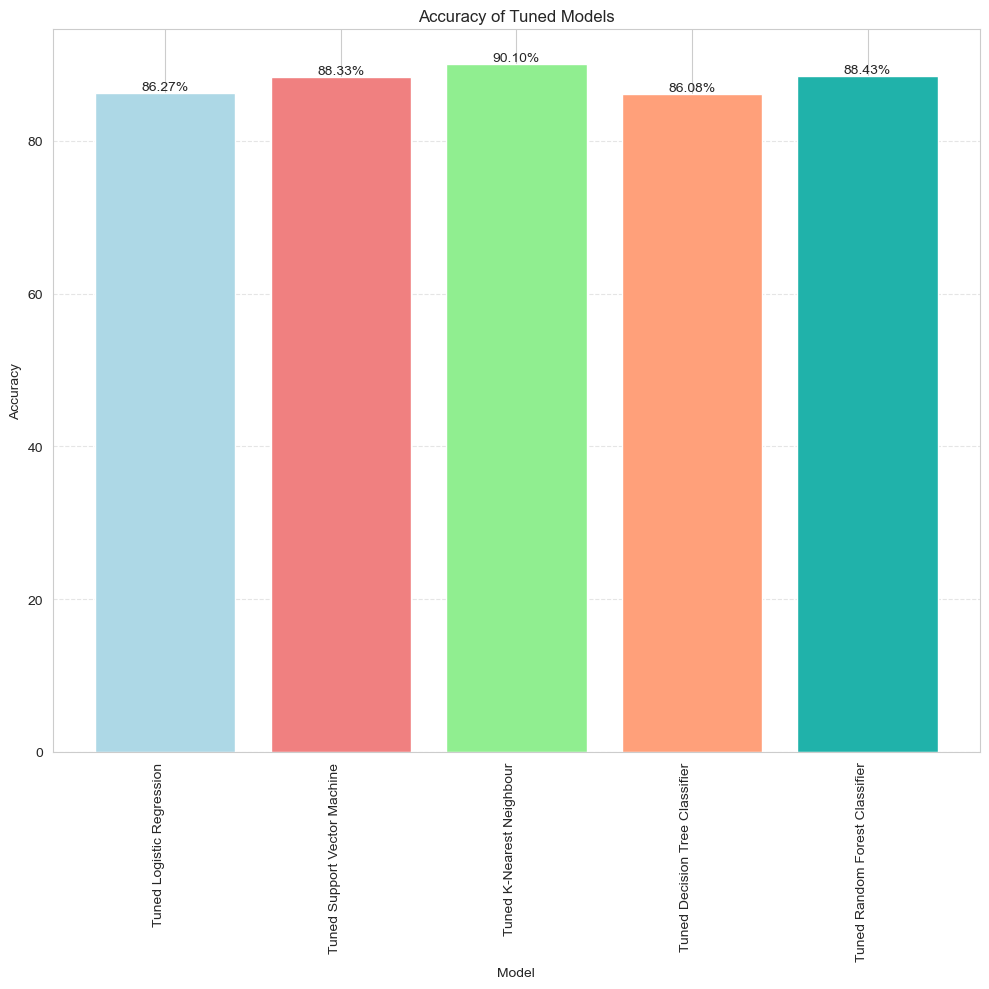

In [235]:
#Define the models and their corresponding test accuracy scores
models = ['Tuned Logistic Regression', 'Tuned Support Vector Machine', 'Tuned K-Nearest Neighbour',
          'Tuned Decision Tree Classifier', 'Tuned Random Forest Classifier']
accuracy_scores = [test_score_tuned_lr, test_score_tuned_svm, test_score_tuned_knn,
                   test_score_tuned_dt, test_score_tuned_rfc]

#Define colors for each bar
light_colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']

plt.figure(figsize=(10, 10))

#Create bar plot
bars = plt.bar(models, accuracy_scores, color=light_colors)

#Annotate each bar with its accuracy score
for bar, score in zip(bars, accuracy_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{score:.2f}%',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Tuned Models')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

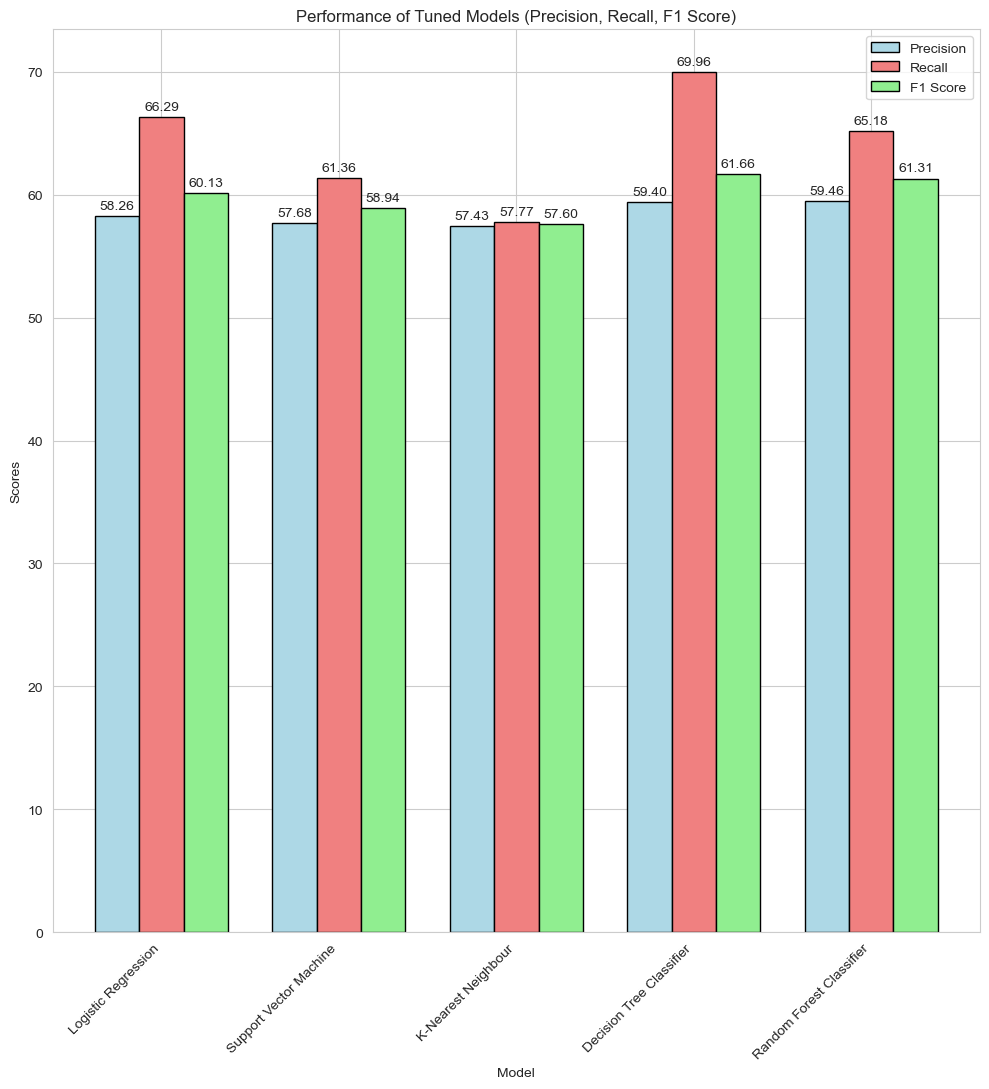

In [274]:
#Define the tuned models and their corresponding scores
tuned_models = ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbour',
                'Decision Tree Classifier', 'Random Forest Classifier']
precision_scores = [test_precision_tuned_lr, test_precision_tuned_svm, test_precision_tuned_knn,
                    test_precision_tuned_dt, test_precision_tuned_rfc]
recall_scores = [test_recall_tuned_lr, test_recall_tuned_svm, test_recall_tuned_knn,
                 test_recall_tuned_dt, test_recall_tuned_rfc]
f1_scores = [test_f1_tuned_lr, test_f1_tuned_svm, test_f1_tuned_knn,
             test_f1_tuned_dt, test_f1_tuned_rfc]

#Set the width of the bars
bar_width = 0.25

#Set the position of the bars on the x-axis
r1 = np.arange(len(tuned_models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

#Grouped bar plot depicting tuned models metric scores
plt.figure(figsize=(10, 11))
bars_precision = plt.bar(r1, precision_scores, color='lightblue', width=bar_width, edgecolor='black', label='Precision')
bars_recall = plt.bar(r2, recall_scores, color='lightcoral', width=bar_width, edgecolor='black', label='Recall')
bars_f1 = plt.bar(r3, f1_scores, color='lightgreen', width=bar_width, edgecolor='black', label='F1 Score')

#Add annotations of ratios
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

add_labels(bars_precision)
add_labels(bars_recall)
add_labels(bars_f1)

#Configure text
plt.xlabel('Model')
plt.ylabel('Scores')
plt.xticks([r + bar_width for r in range(len(tuned_models))], tuned_models, rotation=45, ha='right')
plt.title('Performance of Tuned Models (Precision, Recall, F1 Score)')
plt.legend()
plt.tight_layout()
plt.show()

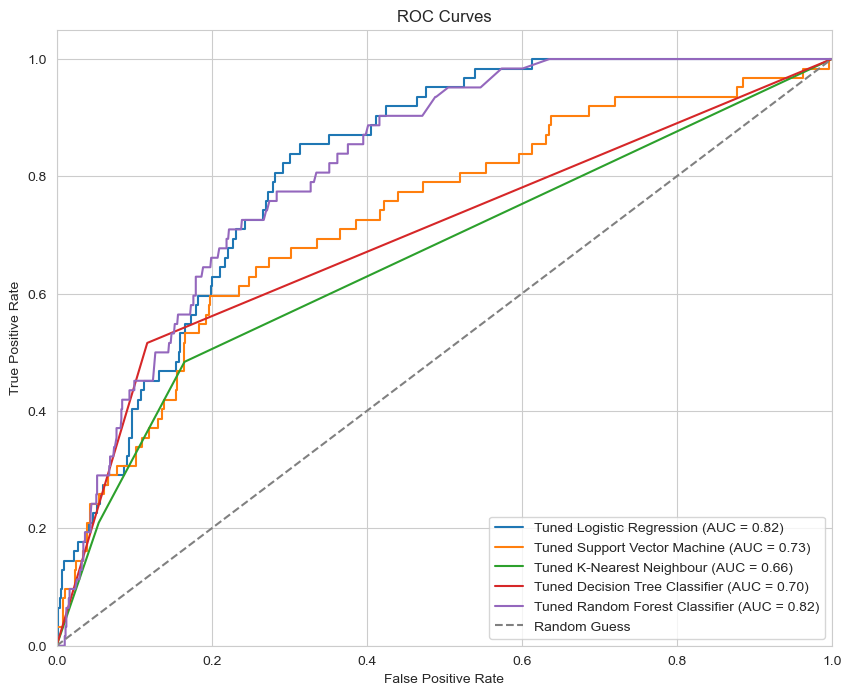

In [279]:
#Define tuned models and their corresponding predictions
tuned_models = [tuned_lr, tuned_svm, tuned_knn, tuned_dt, tuned_rfc]
model_names = ['Tuned Logistic Regression', 'Tuned Support Vector Machine', 'Tuned K-Nearest Neighbour',
               'Tuned Decision Tree Classifier', 'Tuned Random Forest Classifier']

plt.figure(figsize=(10, 8))

#Plot ROC curve for each tuned model
for model, name in zip(tuned_models, model_names):
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test_std)
    else:
        y_score = model.predict_proba(X_test_std)[:, 1]
        
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

#Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()